<a href="https://colab.research.google.com/github/FarazNadeem22/Data-Strcutures/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA: Exploring our data

### Import data from Google drive.


In [3]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read CSV file into a pandas dataframe

In [4]:
import pandas as pd

# Replace 'path/to/your/file.csv' with the actual path to your CSV file in Google Drive
file_path = "/content/drive/MyDrive/Harvard/HES/Ethics/data/device_metrics_measured.csv"
df = pd.read_csv(file_path)
df.head()

,device_id,device_name,device_type,site_id,site_name,site_latitude,site_longitude,site_ac_capacity,event_utc_time,event_local_time,metric,value
0,2009.21.001.BLK01.PAD03.INV01,INV 58,Inverter,2009.21.001,Slate BART,36.226944,-119.893889,50496.0,2025-07-08T06:40:00.000Z,2025-07-07T23:40:00.000Z,ENERGY_DELIVERED_DAILY.MEASURED,38953.0
1,2009.21.001.BLK01.PAD03.INV01,INV 58,Inverter,2009.21.001,Slate BART,36.226944,-119.893889,50496.0,2025-07-08T06:45:00.000Z,2025-07-07T23:45:00.000Z,STATUS_POWER_SOURCE_1.MEASURED,26.0
2,2009.21.001.BLK01.PAD03.INV01,INV 58,Inverter,2009.21.001,Slate BART,36.226944,-119.893889,50496.0,2025-07-08T06:45:00.000Z,2025-07-07T23:45:00.000Z,AC_POWER_LIMIT_SETPOINT.MEASURED,0.0
3,2009.21.001.BLK01.PAD03.INV01,INV 58,Inverter,2009.21.001,Slate BART,36.226944,-119.893889,50496.0,2025-07-08T06:35:00.000Z,2025-07-07T23:35:00.000Z,AC_CURRENT_B.MEASURED,0.0
4,2009.21.001.BLK01.PAD03.INV01,INV 58,Inverter,2009.21.001,Slate BART,36.226944,-119.893889,50496.0,2025-07-08T06:40:00.000Z,2025-07-07T23:40:00.000Z,AC_CURRENT_B.MEASURED,0.0


### Exploring the metric column

In [5]:
# Check how many different metrics are recorded in the metric column
num_unique_vals = df['metric'].nunique()
print(f"Number of unique values in the 'metric' column: {num_unique_vals}\n\n")

# Check the names of the unique metrics
name_unique_vals = df['metric'].unique()
print(f"Unique values in the 'metric' column: {name_unique_vals}")


Number of unique values in the 'metric' column: 125


Unique values in the 'metric' column: ['ENERGY_DELIVERED_DAILY.MEASURED' 'STATUS_POWER_SOURCE_1.MEASURED'
 'AC_POWER_LIMIT_SETPOINT.MEASURED' 'AC_CURRENT_B.MEASURED'
 'HW_VERSION.MEASURED' 'AC_CURRENT_C.MEASURED' 'DC_POWER.MEASURED'
 'VAR.MEASURED' 'AC_VOLTAGE_HI_SETPOINT.MEASURED'
 'INSUL_MON_DC_RESISTOR.MEASURED' 'STATUS_INSUL_MON_AC.MEASURED'
 'DC_CURRENT.MEASURED' 'VARH_DELIVERED.MEASURED'
 'ENERGY_DELIVERED.MEASURED' 'VARH_DELIVERED_DAILY.MEASURED'
 'AC_CURRENT_MAX.MEASURED' 'STATUS_FAULT_MODULE.MEASURED'
 'HEARTBEAT.MEASURED' 'DC_BATT_VOLTAGE_BUS.MEASURED'
 'SVA_LIMIT_SETPOINT.MEASURED' 'DC_CURRENT_MAX.MEASURED'
 'STATUS_FAULT_WORD.MEASURED' 'AC_CURRENT_A.MEASURED'
 'DC_VOLTAGE_P.MEASURED' 'AC_VOLTAGE_BC.MEASURED'
 'INSUL_MON_AC_RESISTOR.MEASURED' 'STATUS_IGBT_MAX_TEMP.MEASURED'
 'DC_VOLTAGE.MEASURED' 'STATUS_MOD_MAX_TEMP.MEASURED'
 'STATUS_MV_PRESSURE.MEASURED' 'DC_VOLTAGE_BUS.MEASURED'
 'STATUS_LV_PRESSURE.MEASURED' 'AC_VOLT

### Convert from long format to wide format:
- Currently, our data is in long format, where the metric has 125 unique values. We want each recoded metric to me its own column.
- Keep site_latitude	site_longitude saved as a variable for later use.

Notes:
- index = ['device_id', 'event_utc_time', 'site_name'] - keep as identifiers
- columns = 'metrics' - give each metric its own column
- values = 'value' - fill each column with its coresponding value from metric
- aggfunc = np.median - if there are multiple entries take the median
- reset_index() - turn the index into a regular column

In [6]:
# Save lat long as a variables
site_lat = df['site_latitude']
site_long = df['site_longitude']

# Define index as a list to make the code more readable
index_lst = ['device_id', 'event_utc_time', 'device_name']

# Create the pivot table

pivot_df = df.pivot_table(index=index_lst, columns='metric', values='value', aggfunc='median').reset_index()
print(f'Shape of the pivot table: {pivot_df.shape}')
pivot_df.columns.name = "Sr_no" # Setting the name of the first column to sr_no to avoid confusion
pivot_df.head()

Shape of the pivot table: (146823, 127)


Sr_no,device_id,event_utc_time,device_name,AC_CURRENT.MEASURED,AC_CURRENT_A.MEASURED,AC_CURRENT_B.MEASURED,AC_CURRENT_C.MEASURED,AC_CURRENT_MAX.MEASURED,AC_POWER.MEASURED,AC_POWER_A.MEASURED,...,VARH_DELIVERED.MEASURED,VARH_DELIVERED_DAILY.MEASURED,VARH_DELIVERED_MONTHLY.MEASURED,VARH_RECEIVED.MEASURED,VAR_A.MEASURED,VAR_B.MEASURED,VAR_C.MEASURED,VAR_LIMIT_SETPOINT.MEASURED,WIND_DIRECTION.MEASURED,WIND_SPEED.MEASURED
0,2009.21.001.BLK01.PAD01.INV01,2025-07-07T07:00:00.000Z,INV 52,NaN,0.0,0.0,0.0,529.0,0.0,NaN,...,65798.0,1042.0,101473.0,NaN,NaN,NaN,NaN,100.0,NaN,NaN
1,2009.21.001.BLK01.PAD01.INV01,2025-07-07T07:05:00.000Z,INV 52,NaN,0.0,0.0,0.0,529.0,0.0,NaN,...,65798.0,1042.0,101473.0,NaN,NaN,NaN,NaN,100.0,NaN,NaN
2,2009.21.001.BLK01.PAD01.INV01,2025-07-07T07:10:00.000Z,INV 52,NaN,0.0,0.0,0.0,529.0,0.0,NaN,...,65798.0,1042.0,101473.0,NaN,NaN,NaN,NaN,100.0,NaN,NaN
3,2009.21.001.BLK01.PAD01.INV01,2025-07-07T07:15:00.000Z,INV 52,NaN,0.0,0.0,0.0,529.0,0.0,NaN,...,65798.0,1042.0,101473.0,NaN,NaN,NaN,NaN,100.0,NaN,NaN
4,2009.21.001.BLK01.PAD01.INV01,2025-07-07T07:20:00.000Z,INV 52,NaN,0.0,0.0,0.0,529.0,0.0,NaN,...,65798.0,1042.0,101473.0,NaN,NaN,NaN,NaN,100.0,NaN,NaN


### Checking the quality of our data
- Using the missingno lib for visualizing missing data:

<Axes: >

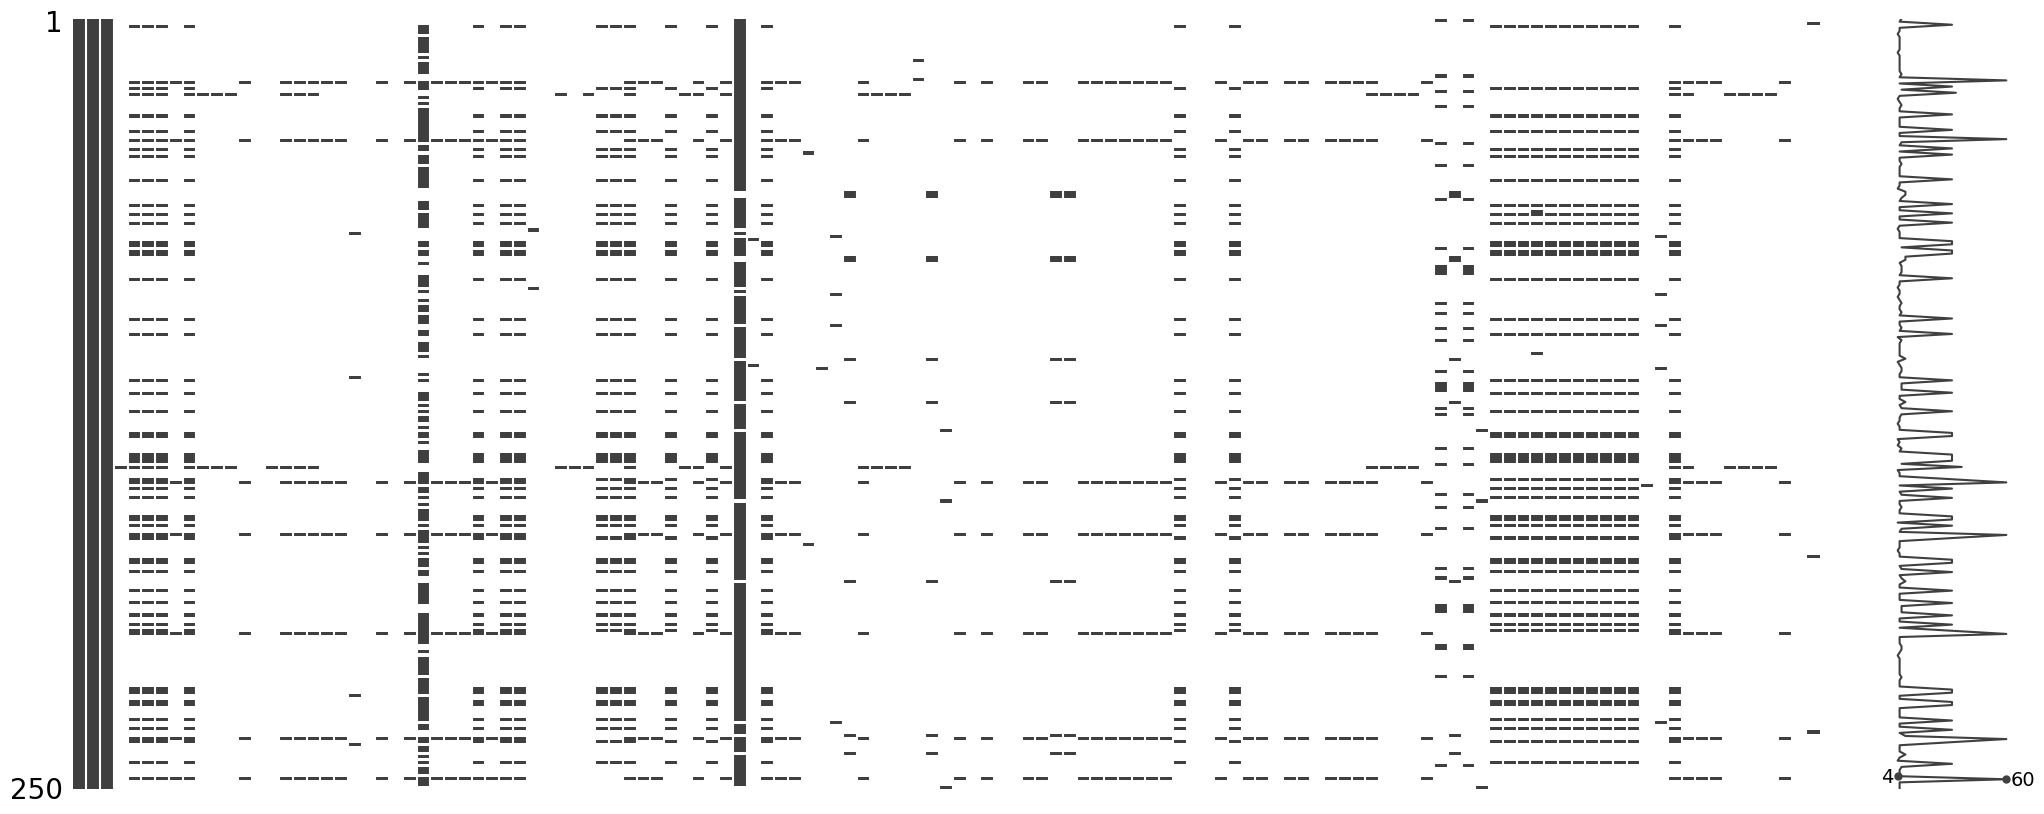

In [7]:
import missingno as msno
%matplotlib inline

# See sample
msno.matrix(pivot_df.sample(250))

<Axes: ylabel='Sr_no'>

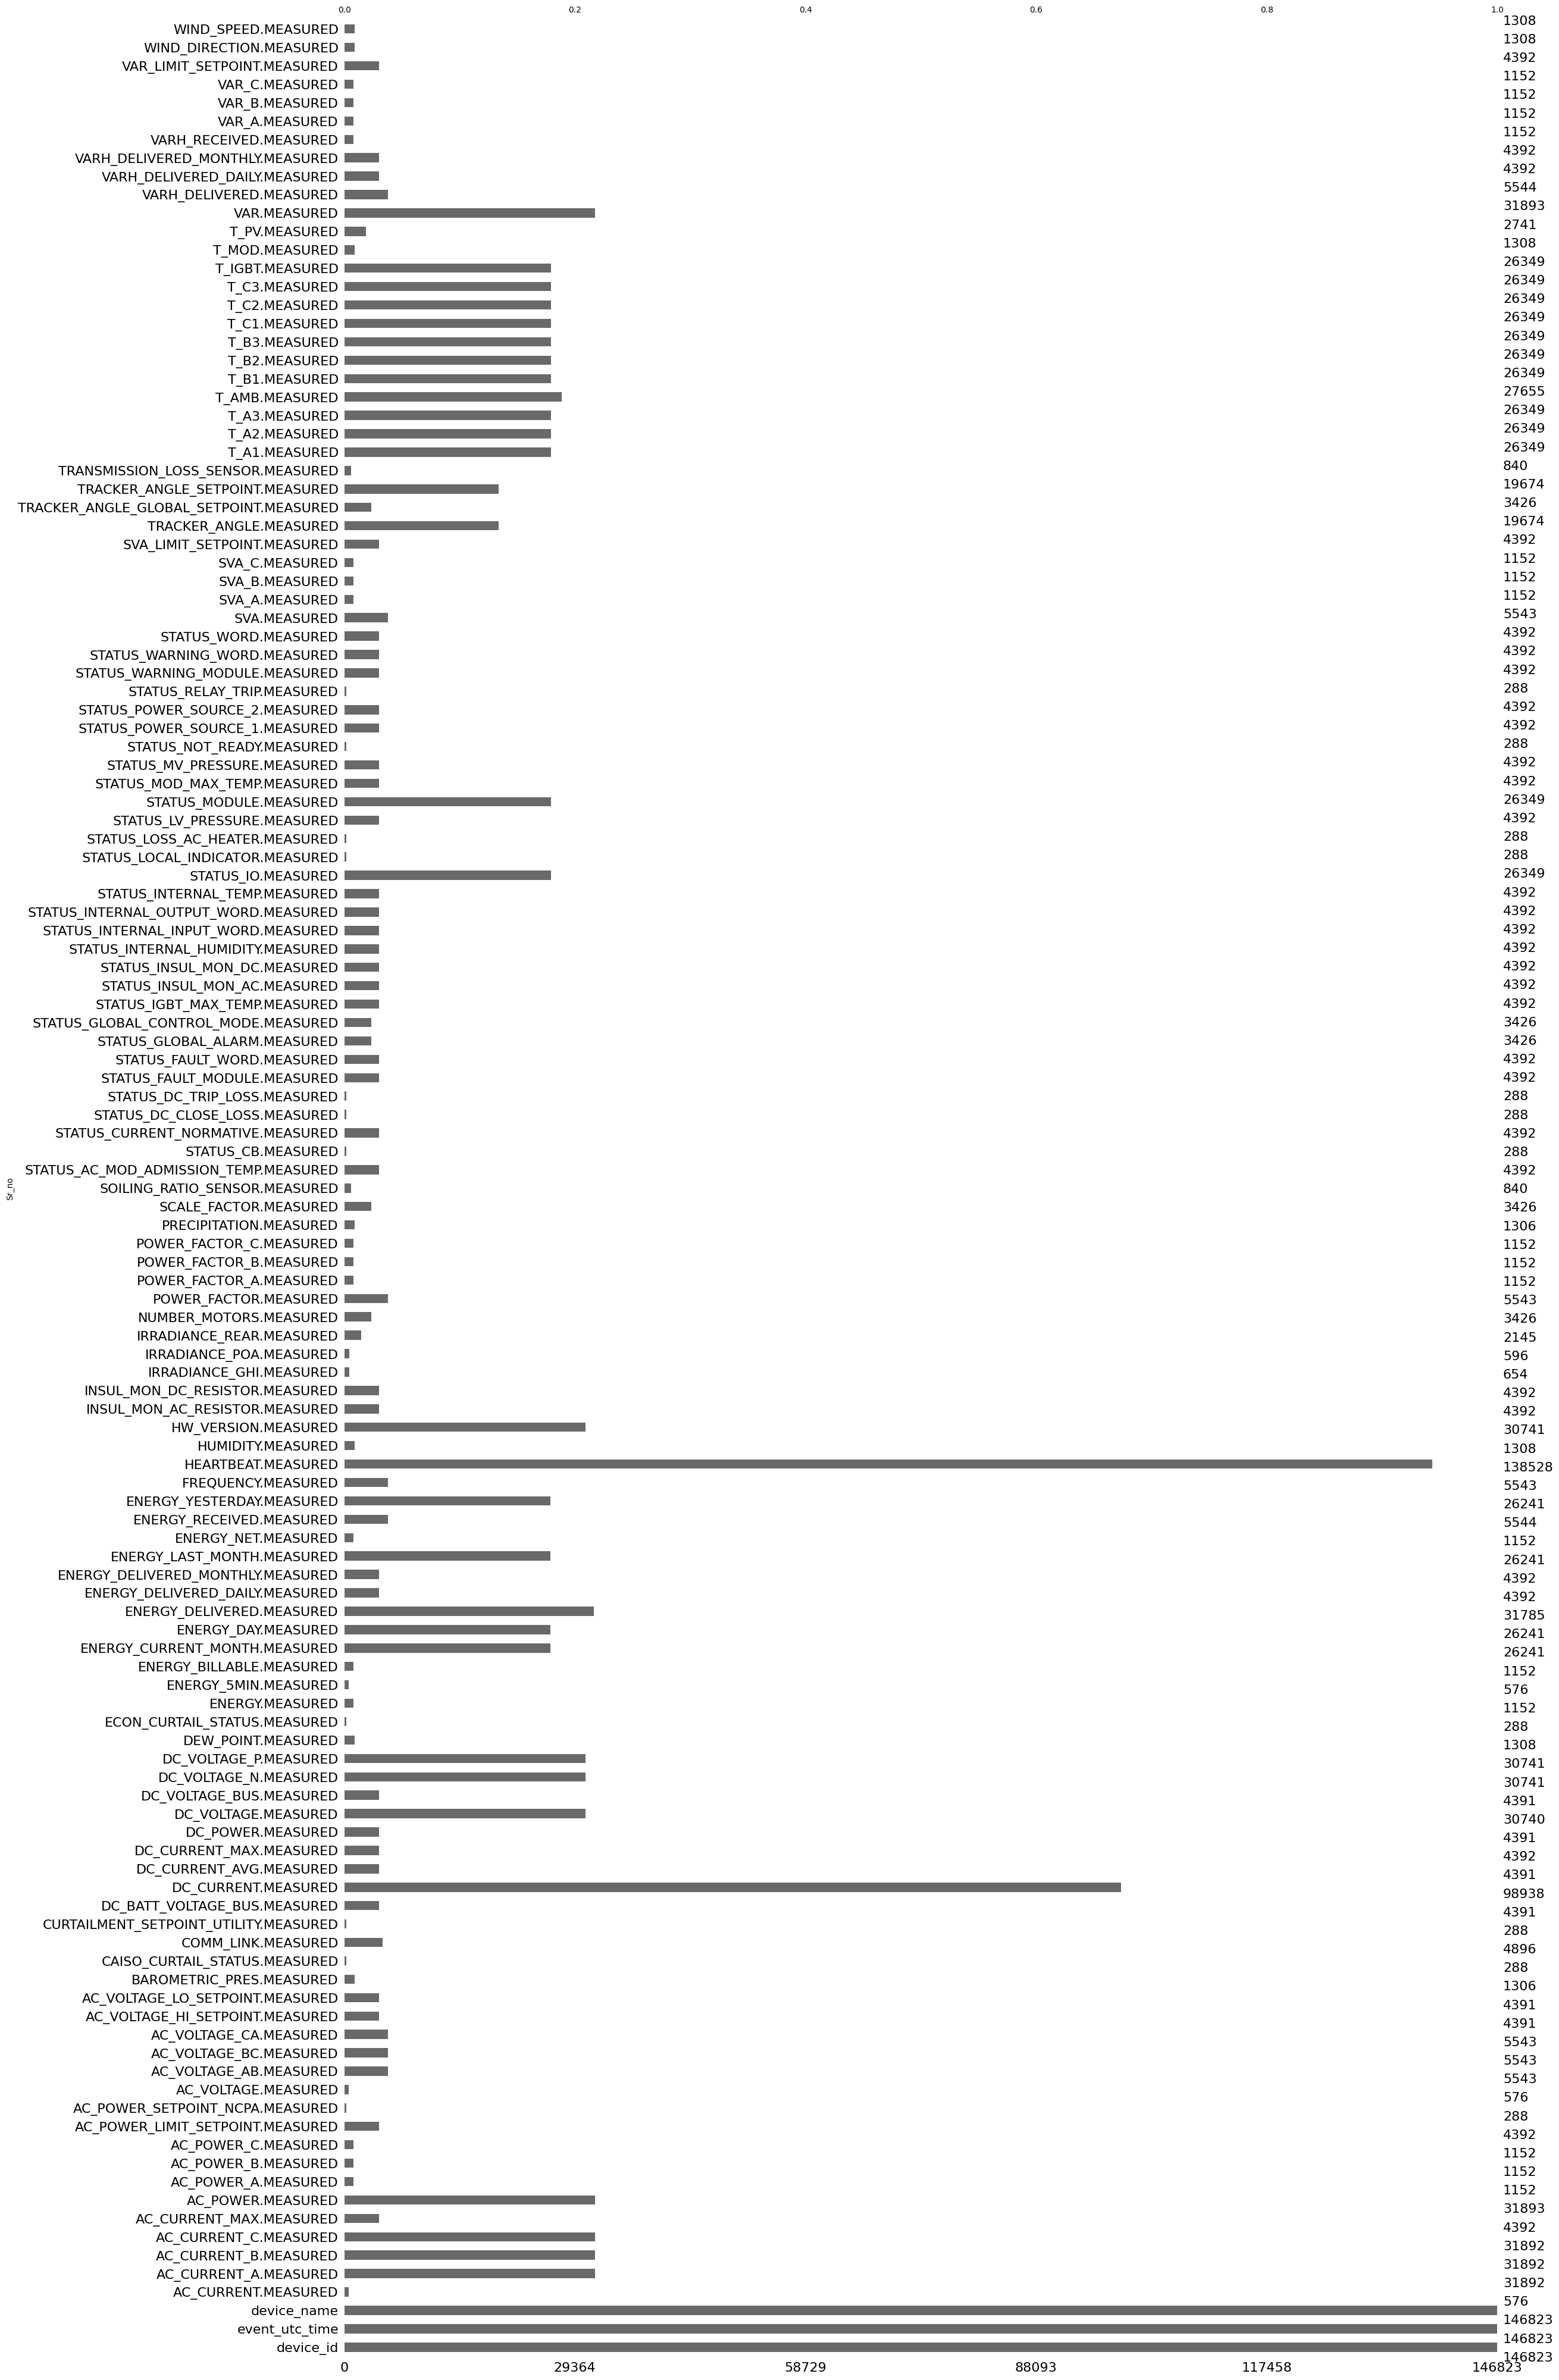

In [8]:
# Create a car chat that shows missing values for each metric
msno.bar(pivot_df)


### This chat shows the number of non-missing values.
hint: (pivot_df.shape[0])      -      (pivot_df['site_name'].isna().sum())  


useful links:
- [Introduction to Missingno in Python Library](https://360digitmg.com/blog/missingno)
- [Github repo for missingno](https://github.com/ResidentMario/missingno)

<Axes: xlabel='Sr_no', ylabel='Sr_no'>

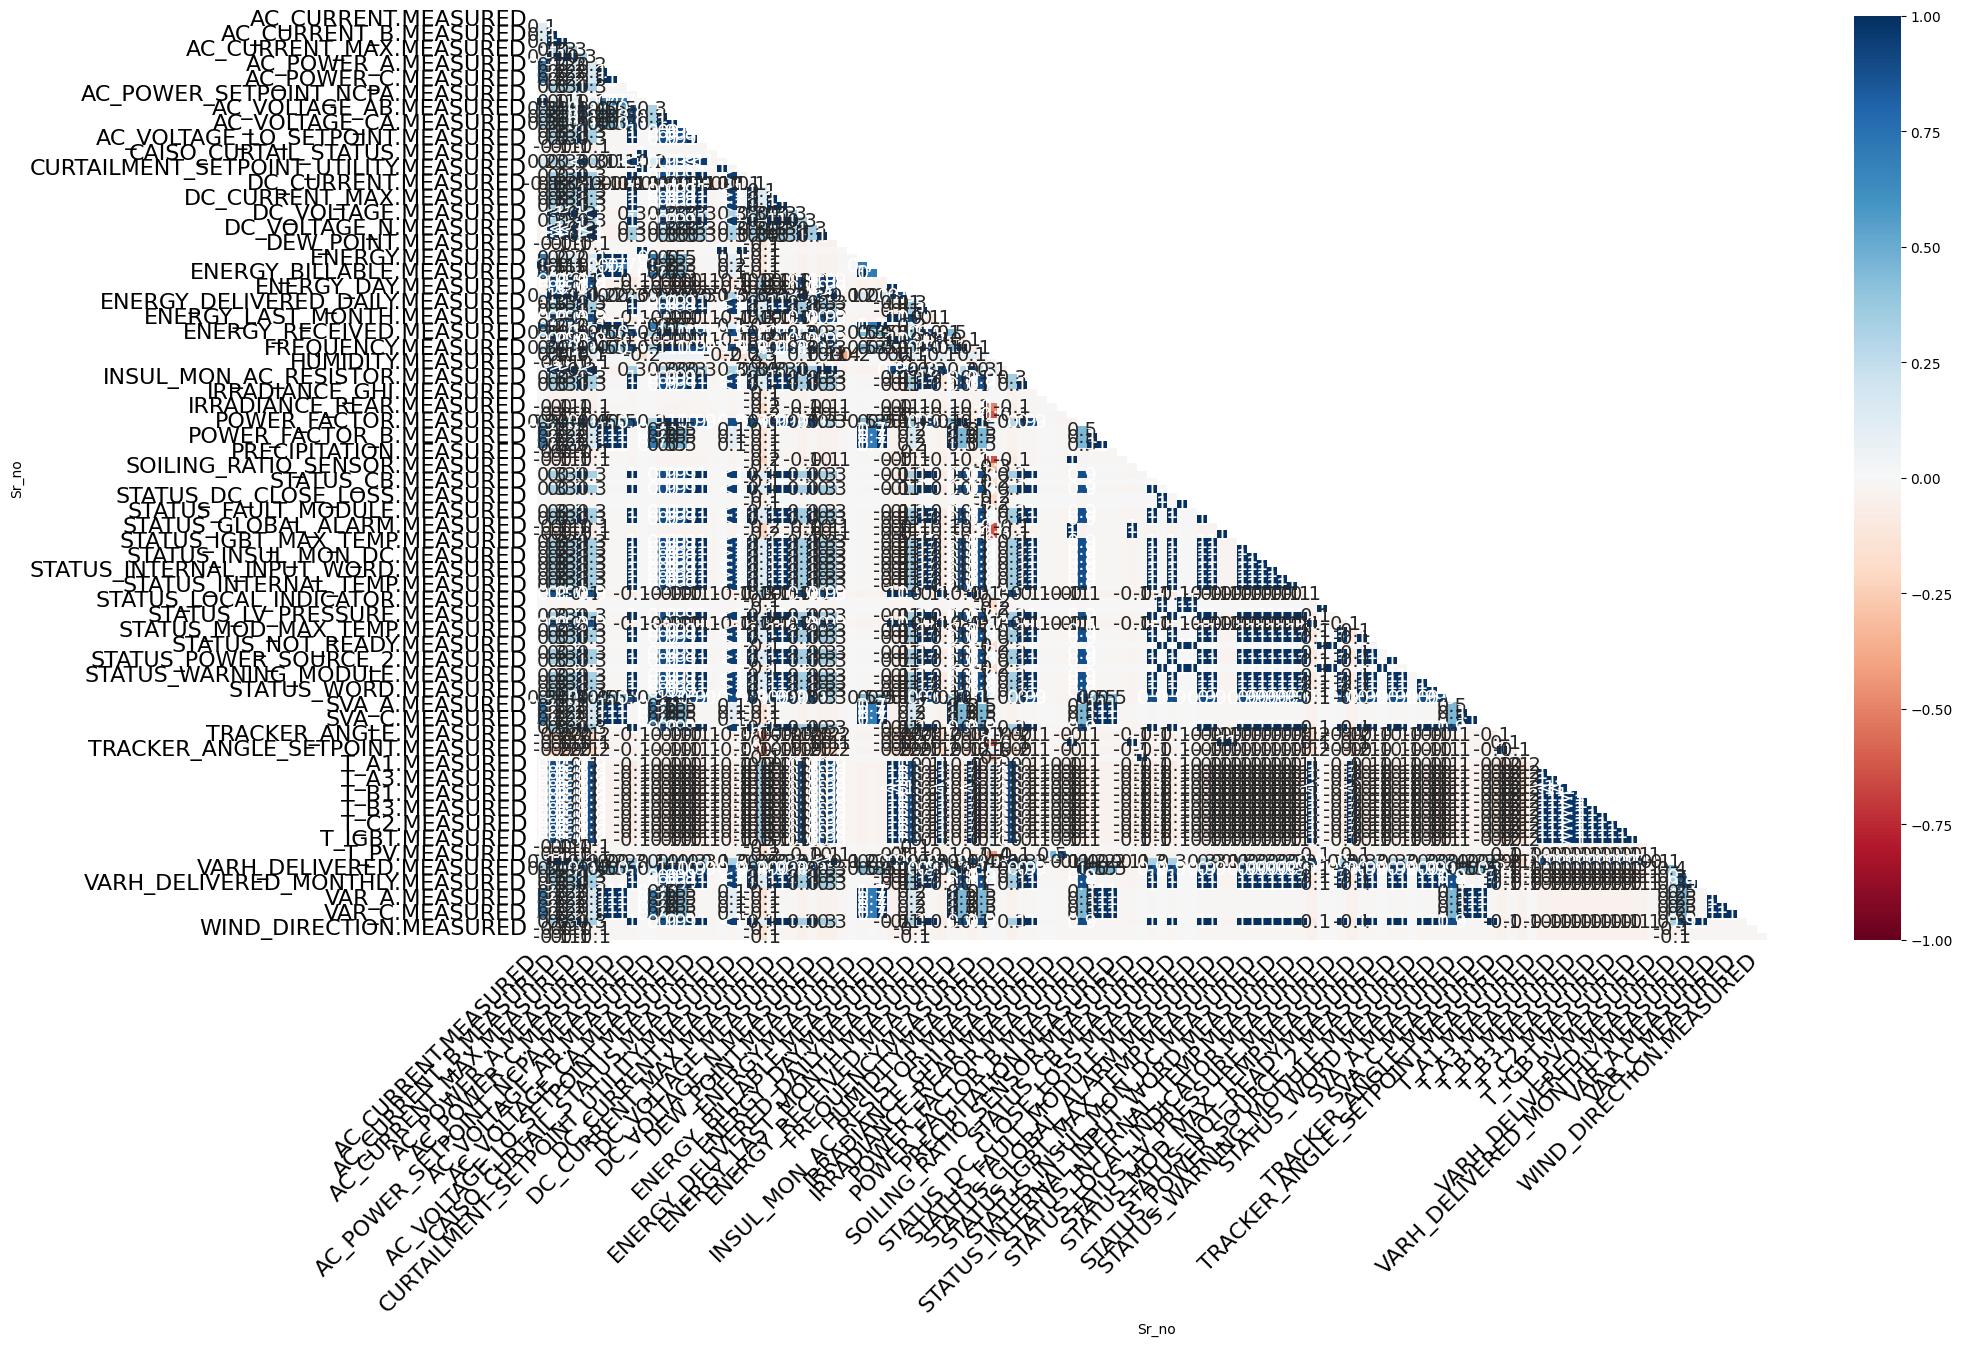

In [9]:
msno.heatmap(pivot_df)

### This, heatmap, is currently useless for us. I will go back to this when I have reduced columsn

### Dropping columns
Rule: Drop columns with more than 80% missing values

In [10]:
# Drop columns with more than 80% missing values, set threshold to 0.8

threshold = 0.8
clean_pivot_df = pivot_df.loc[:, pivot_df.isnull().mean() < threshold]
clean_pivot_df.head()

Sr_no,device_id,event_utc_time,device_name,AC_CURRENT_A.MEASURED,AC_CURRENT_B.MEASURED,AC_CURRENT_C.MEASURED,AC_POWER.MEASURED,DC_CURRENT.MEASURED,DC_VOLTAGE.MEASURED,DC_VOLTAGE_N.MEASURED,DC_VOLTAGE_P.MEASURED,ENERGY_DELIVERED.MEASURED,HEARTBEAT.MEASURED,HW_VERSION.MEASURED,VAR.MEASURED
0,2009.21.001.BLK01.PAD01.INV01,2025-07-07T07:00:00.000Z,INV 52,0.0,0.0,0.0,0.0,0.0,1.700000,0.0,1.000000,0.0,1.0,1.0,0.0
1,2009.21.001.BLK01.PAD01.INV01,2025-07-07T07:05:00.000Z,INV 52,0.0,0.0,0.0,0.0,0.0,1.625490,0.0,1.000000,0.0,1.0,1.0,0.0
2,2009.21.001.BLK01.PAD01.INV01,2025-07-07T07:10:00.000Z,INV 52,0.0,0.0,0.0,0.0,0.0,1.250698,0.0,0.829761,0.0,1.0,1.0,0.0
3,2009.21.001.BLK01.PAD01.INV01,2025-07-07T07:15:00.000Z,INV 52,0.0,0.0,0.0,0.0,0.0,1.232704,0.0,1.000000,0.0,1.0,1.0,0.0
4,2009.21.001.BLK01.PAD01.INV01,2025-07-07T07:20:00.000Z,INV 52,0.0,0.0,0.0,0.0,0.0,0.767544,0.0,1.000000,0.0,1.0,1.0,0.0


### Check missing values and heatmap with the clean pivot dataframe

<Axes: xlabel='Sr_no'>

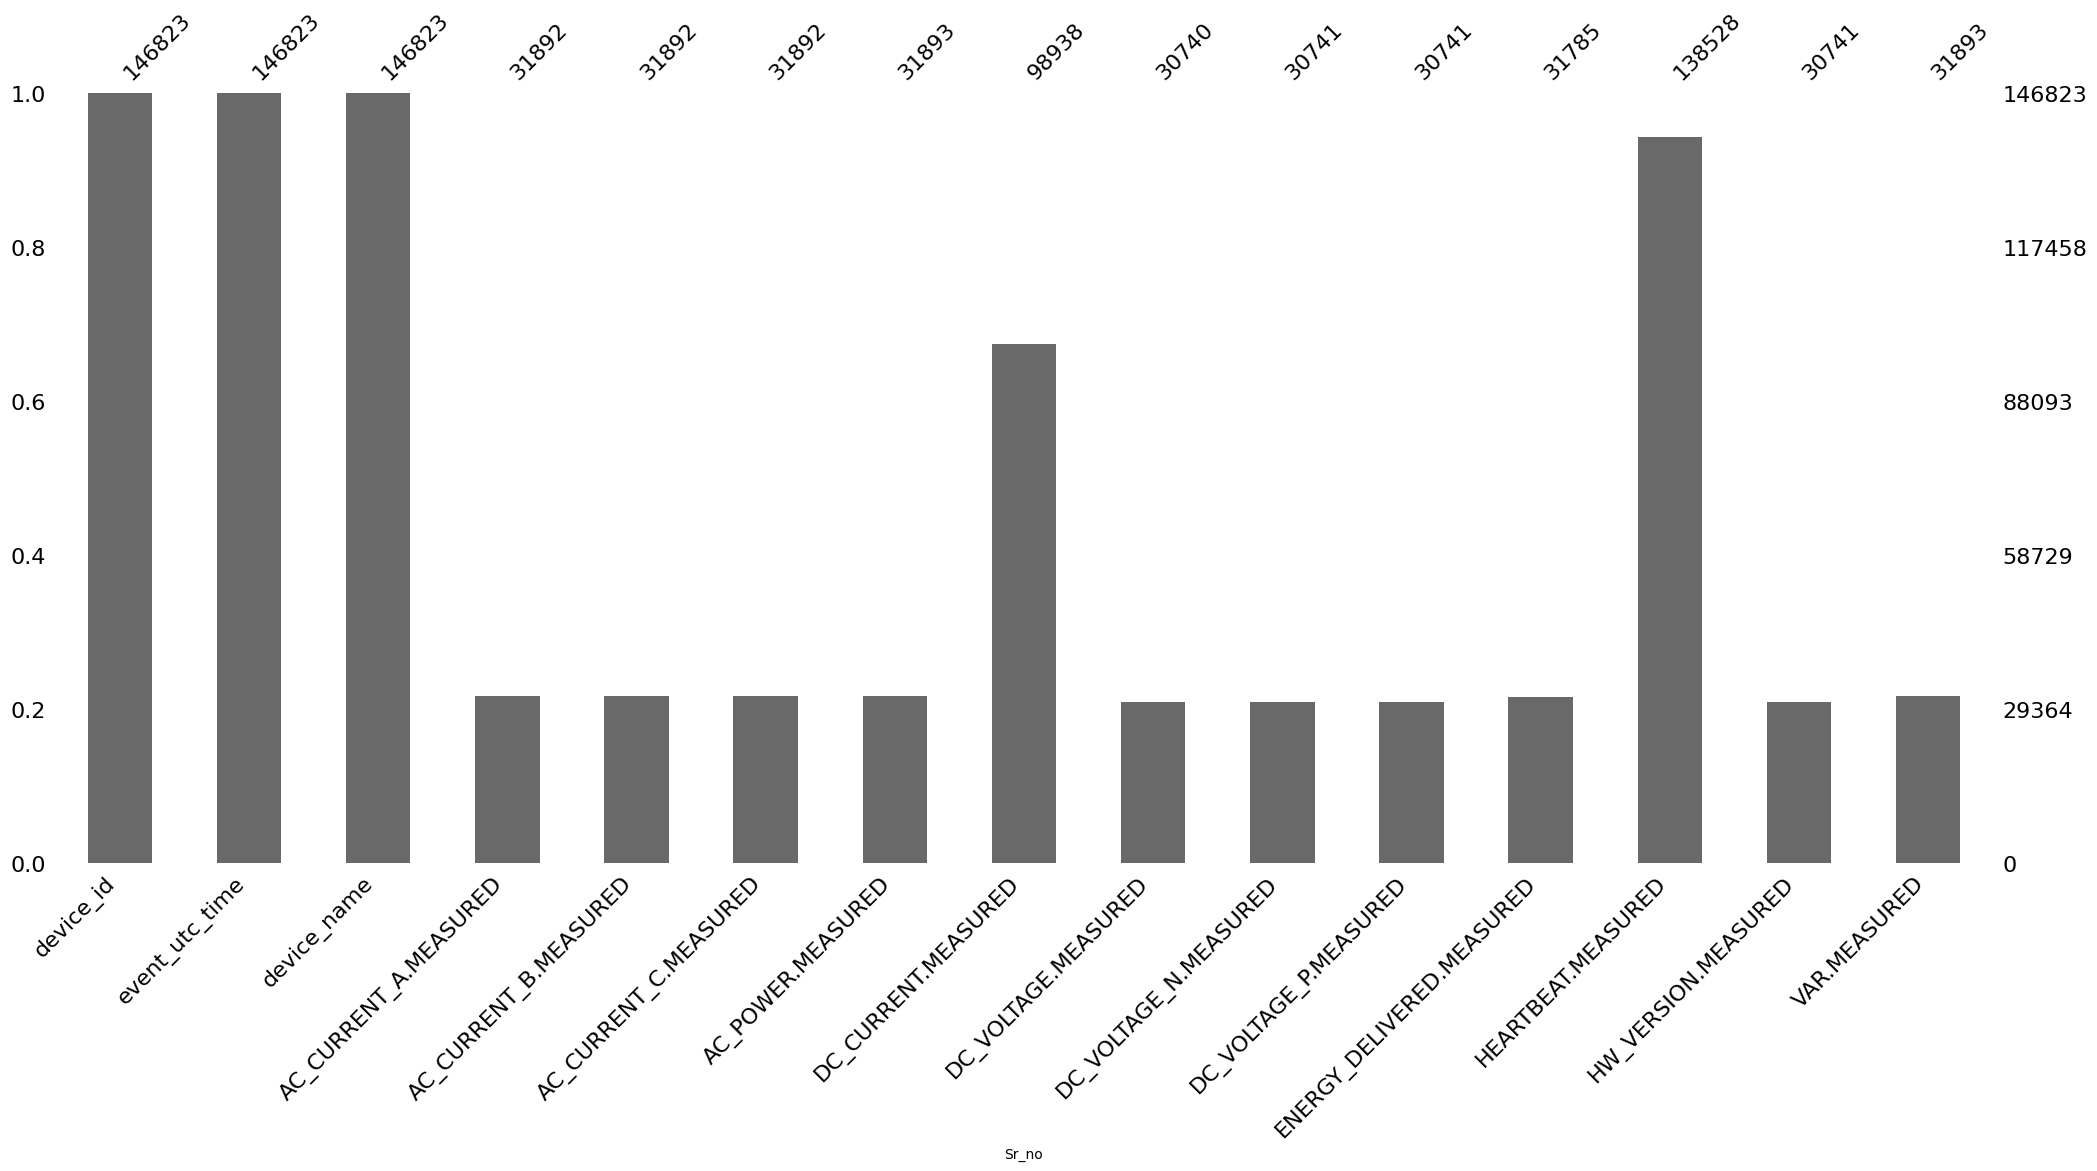

In [11]:
# Looking at the car chat for the new dataframe

msno.bar(clean_pivot_df)

<Axes: xlabel='Sr_no', ylabel='Sr_no'>

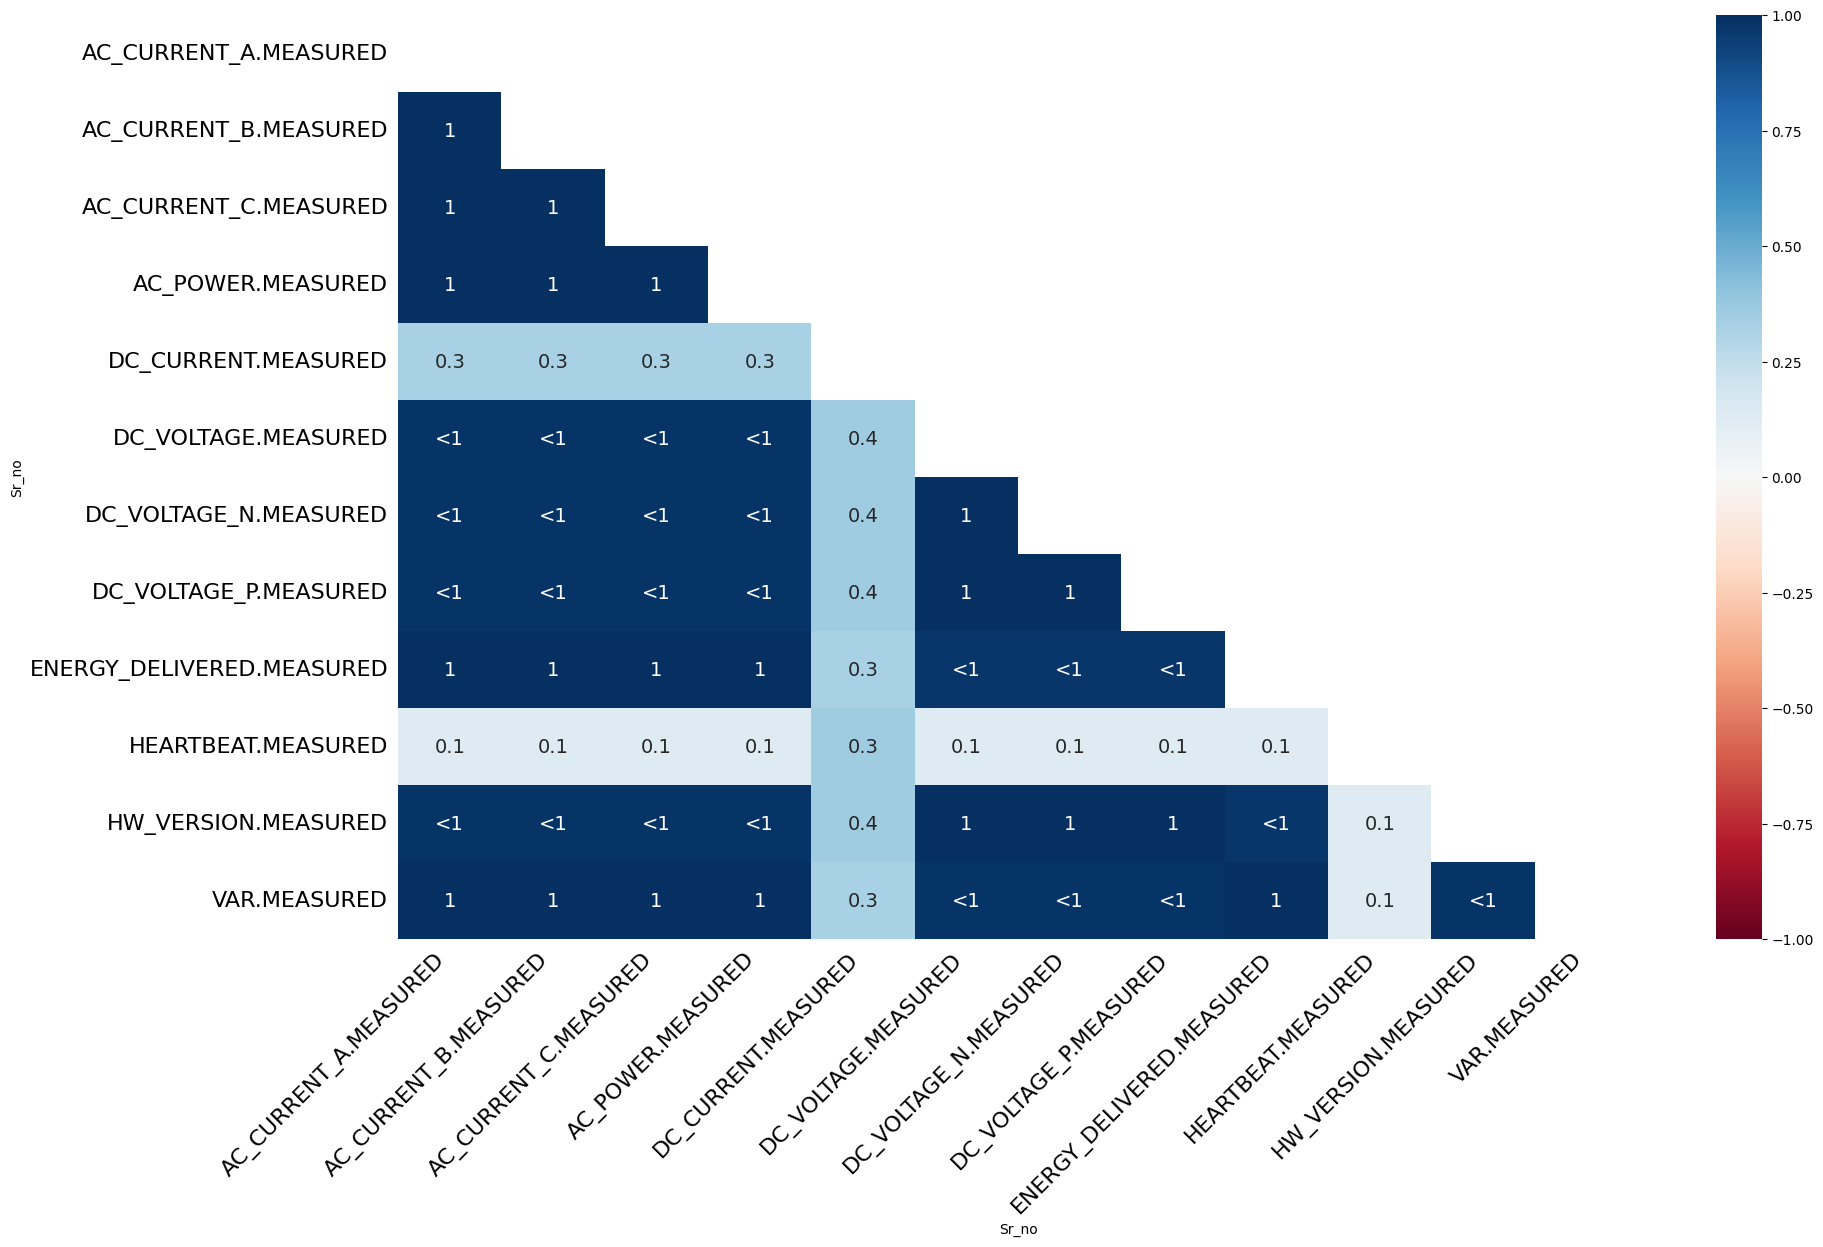

In [12]:
# Heatmap check
msno.heatmap(clean_pivot_df)

### Looking at a dendrogram:
- We see that AC sensors are correlated together
- We see that DC sensors are correlated together
- While the Metedata like event_utc_time, device_id, device_name are not correlated to anyting


<Axes: >

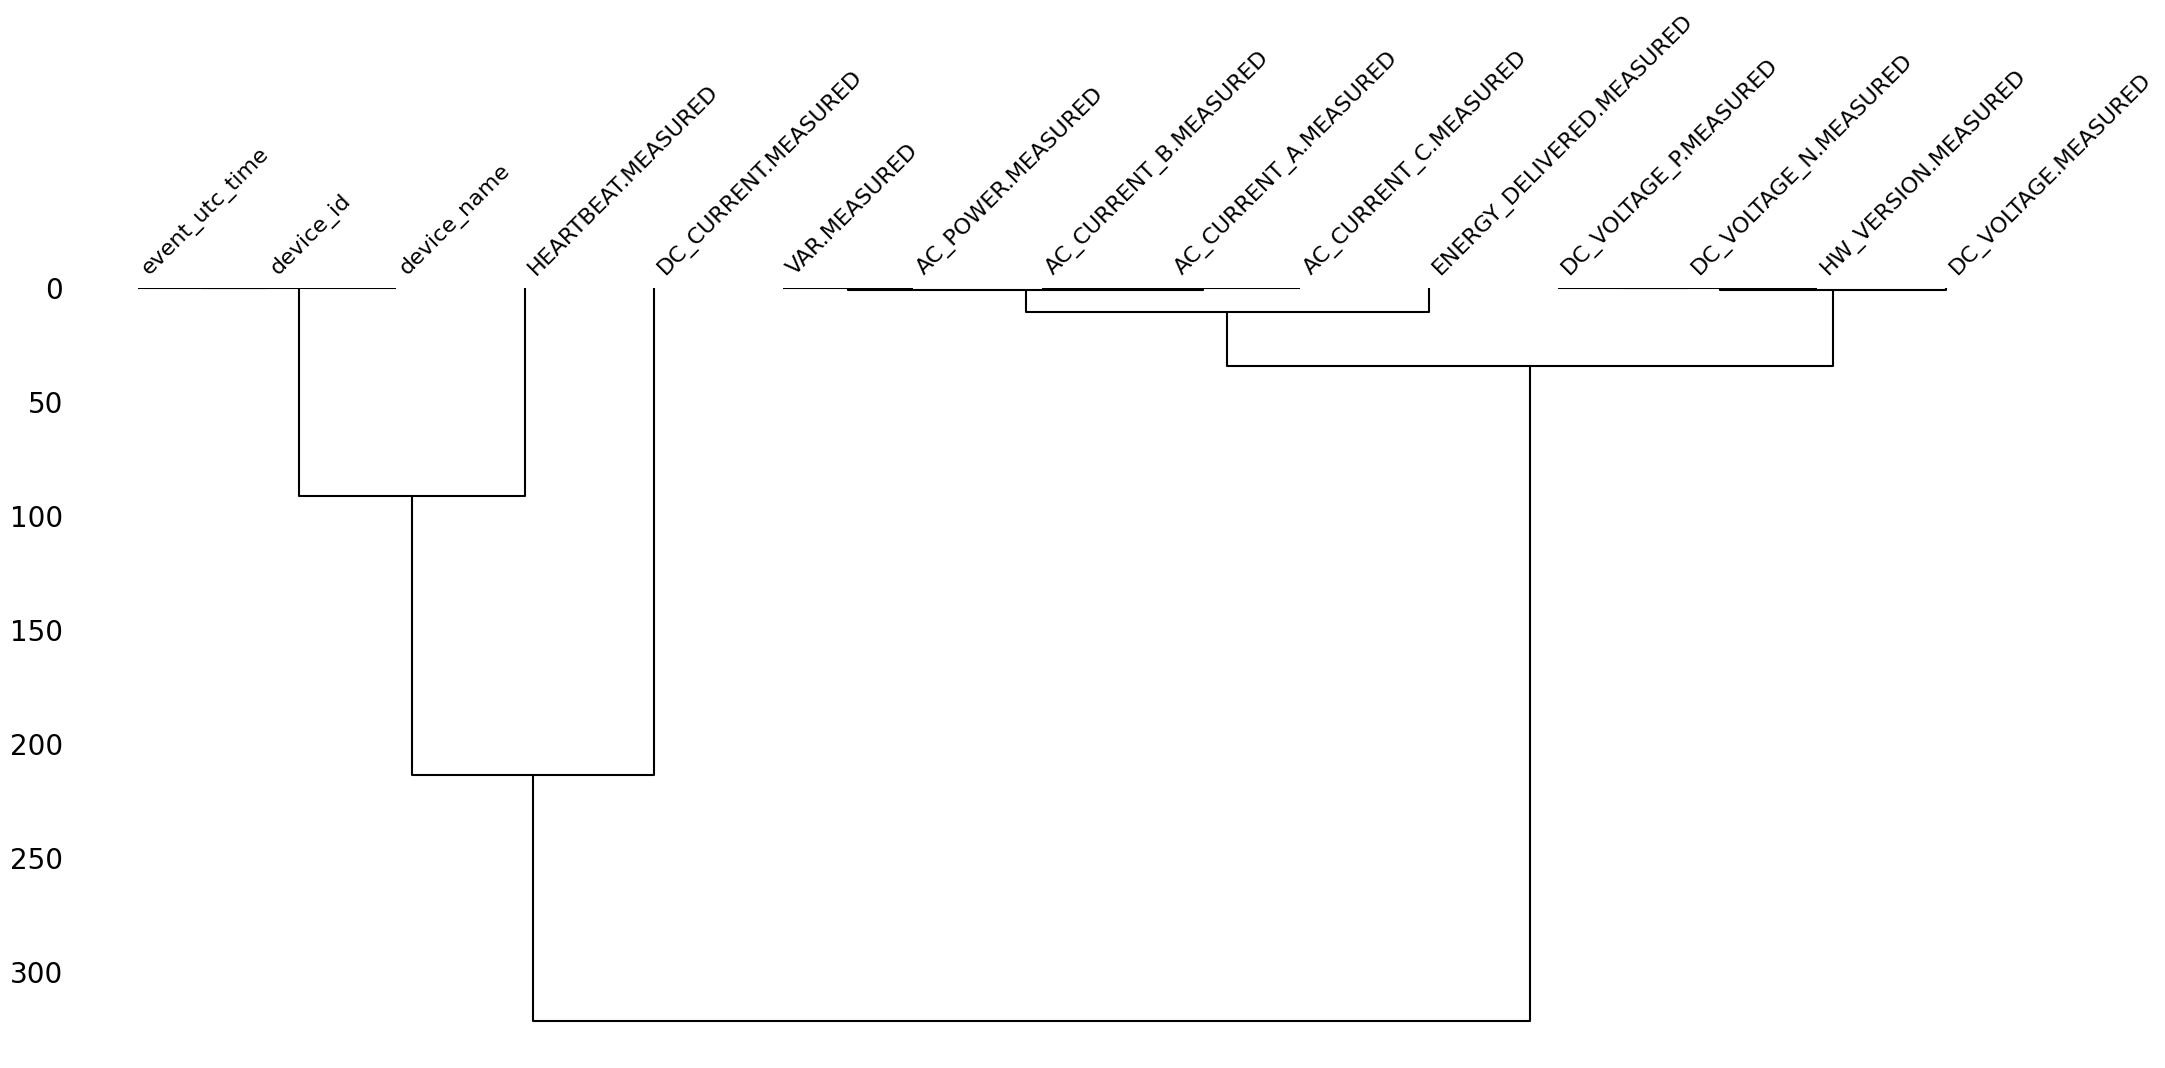

In [13]:
msno.dendrogram(clean_pivot_df)

### Clearning the data
- Make deep copy
- Drop the identifier columns ['device_id', 'event_utc_time', 'site_name']
- Select remianing columns as numeric cols
- Count Zeroz
- Get percent of zeros
- combine into one df
-

In [22]:
# Make deep copy
df = clean_pivot_df.copy()

# Identify columns numeric vs id columns
id_cols = ['device_id', 'event_utc_time', 'site_name']

# Get numeric columns
numeric_cols = [col for col in df.columns if col not in id_cols]

# Count Zeros in each of the numeric cols
zeros = (df[numeric_cols] == 0).sum().sort_values(ascending=False)

# Get the number of rows
total_count = len(df)

# Calculate the percent of the number of zeros
zero_percent = ((df[numeric_cols]== 0).sum() / len(df) * 100).sort_values(ascending=False)

"""
zero_df = pd.concat([zeros, total_count, zero_percent], axis=1)
zero_df.columns = ['num_zeros', 'total_count' ,'percent_zeros']
zero_df.head()
"""

zero_df = pd.DataFrame({'num_zeros': zeros, 'total_count': total_count, 'percent_zeros': zero_percent})
zero_df.head()

,num_zeros,total_count,percent_zeros
Sr_no,,,
HW_VERSION.MEASURED,22782,146823,15.516642
DC_CURRENT.MEASURED,15543,146823,10.586216
AC_CURRENT_B.MEASURED,14415,146823,9.817944
AC_CURRENT_A.MEASURED,14244,146823,9.701477
AC_CURRENT_C.MEASURED,14243,146823,9.700796
